## Some Logistic Regression Concepts
$z = w^{t}x + b$  
$\hat{y} = a = \sigma(z)$  
$L(a, y) = -(y\log{a}+(1-y)\log{(1-a)})$  

process of foreward and backward propagation:
<img src="image/propagation.png" style="width:80%;">

we get the cost function by all the calculation at the front. We can modify w and b by using backward propagation by calculating the derivatives using chain rule.

## Some Calculations
<img src="image/calculations.jpg" style="width:50%;">

---


In [15]:
import numpy as np
import time

a = np.random.rand(10000000)
b = np.random.rand(10000000)

t1 = time.time()
c = np.dot(a,b)
t2 = time.time()
print(c)
print("numpy: "+ str(1000*(t2-t1)) + "ms")

t1 = time.time()
for i in range(10000000):
    c = a[i] * b[i]
t2 = time.time()
print(c)
print("numpy: "+ str(1000*(t2-t1)) + "ms")

2500022.044102834
numpy: 3.172636032104492ms
0.5401602835576047
numpy: 1403.7532806396484ms


**By the experiment above, I found out that using numpy to do matrix calculations is much more efficient.**

## Vectorizing Logistic Regression
x is the input matrix, having a shape of ($n_x$, m), which means every column is a training example, and each row represents each feature.

$w^T$ is a row vectors. By multipling $w^T$ and x, and then plus b, we can get z

***

## Neural Network
[i] represents data in i-th layer  

neural network is just repeating z and a calculations  

There are three layers in a neural network: input layer, hidden layer, output layer
- input layer: x or $a^{[0]}$
- hidden layer: something like $a^{[1]}$  
$a^{[1]}_1$ means hidden layer 1 node 1

When we count layer, we don't count input layer. When a neural network has 1 input layer, 1 hidden layer and 1 output layer, it is a two-layer neural network.

## Activation Functions
sigmoid function is an example of activation function.  

tanh(z) is also an example of activation function, and it works better than sigmoid function, since it can generates an average of 0 instead of 0.5. However, it is not useful for binary classification.  

Therefore, we can use tanh(z) in hidden layer, sigmoid function for the output layer.

Both tanh(z) and sigmoid function's slope at the end is close to zero, which will slow down gradient descent. Therefore, we can use ReLU function. 

We don't use linear function in hidden layer, because it can not learn any non-linear relationships.

## Hyperparameters
- learning rate $\alpha$
- number of iterations
- number of hidden layer L
- number of hidden units
- choice of activation function

## Process

<img src="image/process.png" style="width:50%;">

---

## Implementing Neural Network

In [130]:
'''
w[l]: (n[l], n[l-1])
b[l]: (n[l], 1)
'''

class MyNeuralNetwork:

    '''
    num_layer: number of layer including input layer
    layer_size: units of hidden layer

    weights and bias are hidden layers
    '''
    def __init__(self, layer_size: list):
        self.num_layer = len(layer_size)
        self.layer_size = layer_size

        self.weights = []
        self.bias = []

        # initializing weights and bias
        for i in range(len(layer_size)-1):
            self.weights.append(np.random.rand(layer_size[i+1], layer_size[i]) * 0.01)
            self.bias.append(np.zeros((layer_size[i+1], 1)))


    # forward propagation
    def forward(self, a0):
        a = a0
        self.z_value = []
        self.a_value = [a0]
        
        for idx, (w,b) in enumerate(zip(self.weights, self.bias)):
            z = np.dot(w, a) + b
            if idx == len(self.weights) - 1:  # use sigmoid for output layer
                a = self.sigmoid(z)
            else:  # hidden layers use ReLU function
                a = self.ReLU(z)
            self.z_value.append(z)
            self.a_value.append(a)
            
        return a
    

    # backward propagation
    def backward(self, y):
        m = y.shape[1]
        L = self.num_layer - 1
        dw_value = [0] * L
        db_value = [0] * L

        dz = self.a_value[len(self.a_value)-1] - y  # dL/dz
        a_prev = self.a_value[-2]
        dw_value[L-1] = (1/m) * np.dot(dz, a_prev.T)  # the last index of dw_value
        db_value[L-1] = (1/m) * np.sum(dz, axis=1, keepdims=True)
        
        for i in reversed(range(L-1)): # start from L-2
            a_prev = self.a_value[i] # get a from previous layer. a has a[0] initially, so we can use i directly
            da = np.dot(self.weights[i+1].T, dz)
            dz = self.ReLU_backward(da, self.z_value[i])
            dw_value[i] = (1/m) * np.dot(dz, a_prev.T)
            db_value[i] = (1/m) * np.sum(dz, axis=1, keepdims=True)

        return dw_value, db_value
    
    # update w and b
    def update_params(self, dw_value, db_value, alpha=0.01):
        for i in range(len(dw_value)):
            self.weights[i] -= alpha*dw_value[i]
            self.bias[i] -= alpha*db_value[i]
    

    # activation derivatives
    def sigmoid_backward(self, da, z):
        return da * self.sigmoid(z) * (1-self.sigmoid(z))
    
    def ReLU_backward(self, da, z):
        dz = np.array(da, copy=True)
        dz[z <= 0] = 0
        return dz
    
    # cost function
    def compute_cost(self, y_hat, y):
        m = y.shape[1]
        return -(1/m) * np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

    # activation functions
    def ReLU(self, x):
        return np.maximum(0, x)
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
        
        
    

In [132]:
# the first element in [3,4,4,1] is a[0]
test_model = MyNeuralNetwork([3,4,4,1])
a0 = np.array([1,2,3]).reshape(3,1) # making it a vector
y = np.array([1]).reshape(1,1)
print(test_model.weights)
y_hat = test_model.forward(a0)
print(y_hat) # print a[L]
print(test_model.compute_cost(y_hat, y)) # print a[L]

[array([[0.0014954 , 0.00208662, 0.00478187],
       [0.00978309, 0.00249451, 0.00805446],
       [0.00432657, 0.00034246, 0.00028972],
       [0.00381018, 0.00592315, 0.00812024]]), array([[0.00660783, 0.00095504, 0.00138225, 0.00167857],
       [0.00719896, 0.00922536, 0.00669039, 0.00441909],
       [0.00817289, 0.00480911, 0.00688374, 0.00884271],
       [0.00113727, 0.00545292, 0.00423087, 0.00178304]]), array([[0.00300458, 0.0096787 , 0.00138166, 0.00417738]])]
[[0.50000253]]
0.69314212441945


In [133]:
model = MyNeuralNetwork([3,4,4,1])
# 4 samples with 3 features  3*4
# each column represents a sample, each row represents features
x = np.array([[1,2,3,0],
              [3,2,4,0],
              [4,5,6,0]]).reshape(3,4)
y = np.array([1,0,1,0]).reshape(1,4)
for i in range(100):
    predict = model.forward(x)
    dw, db = model.backward(y)
    model.update_params(dw, db)

print(model.compute_cost(predict, y))

    

0.6931442723746551


## Using Iris dataset to test the performance

In [159]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data.T
y = data.target
print("x-shape: ", X.shape)
print("y-shape: ", y.shape)

# choose only the second two types
X = X[:, y < 2]
y = y[y < 2].reshape(1, -1)

print("x-shape: ", X.shape)
print("y-shape: ", y.shape)

model = MyNeuralNetwork([4,4,4,1])

for i in range(1000):
    predict = model.forward(X)
    dw, db = model.backward(y)
    model.update_params(dw, db)
    if i % 100 == 0:
        print(model.compute_cost(predict, y))


    

x-shape:  (4, 150)
y-shape:  (150,)
x-shape:  (4, 100)
y-shape:  (1, 100)
0.6931448446508596
0.6931447457871373
0.6931446421749938
0.6931445335092847
0.6931444194646565
0.6931442996925857
0.6931441738185748
0.6931440414393315
0.6931439021198189
0.6931437553900927


### The cost does not change significantly. My opinion is that the time of iterations is too less. We should increase the number of iterations.

In [165]:
model = MyNeuralNetwork([4,4,4,1])

for i in range(10000):
    predict = model.forward(X)
    dw, db = model.backward(y)
    model.update_params(dw, db)
    if i % 1000 == 0:
        print(model.compute_cost(predict, y))

0.6931447657058082
0.6931433062028814
0.6931407820162232
0.6931359383683665
0.6931252628657988
0.6930963463522002
0.6929849923829321
0.6920597034686382
0.5518702977636878
0.11580674615647357


### I found out that the cost varies a lot. Sometime it does not changes even a little bit, sometime it can decrease to a small value. I think it might be due to the randomized initialization of weight and bias.

In [174]:
model = MyNeuralNetwork([4,8,8,1])

for i in range(10000):
    predict = model.forward(X)
    dw, db = model.backward(y)
    model.update_params(dw, db)
    if i % 1000 == 0:
        print(model.compute_cost(predict, y))

0.6931401369149088
0.6931320955534654
0.6931113556815031
0.693041194903371
0.692619636562403
0.6765777162705723
0.1563953053548609
0.07068252734375041
0.044145706844770274
0.03175000601182681


### However, I tried to increases the number of neurals inside the NN, I found out that the cost becomes much more stable. It can always reach a value near 0.03

In [183]:
model = MyNeuralNetwork([4,8,8,5,1])

for i in range(300000):
    predict = model.forward(X)
    dw, db = model.backward(y)
    model.update_params(dw, db)
    if i % 15000 == 0:
        print(model.compute_cost(predict, y))

0.6931470153260588
0.6931469282933094
0.6931467864185105
0.6931465310634842
0.6931460013061477
0.6931446104810908
0.6931386614159608
0.6929493961970367
0.009777983280215197
0.004038966806968863
0.0025374805952931363
0.0018481672372546293
0.0014527771728195704
0.001196488092889216
0.001016926698412626
0.0008841455616390504
0.0007819851596887688
0.0007009544781424676
0.0006351170617543779
0.0005805686864693273


### I found out that after adding a hidden layer, it take much more time and iterations to converge. Howver, its cost will also decreases significantly after some point.

In [185]:
model = MyNeuralNetwork([4,8,8,1])

for i in range(30000):
    predict = model.forward(X)
    dw, db = model.backward(y)
    model.update_params(dw, db, 0.05)
    if i % 1000 == 0:
        print(model.compute_cost(predict, y))

0.6931377493843044
0.48161795902076626
0.022792653072599693
0.01107181547149723
0.007270093997151989
0.00540157477915085
0.004293109773008243
0.0035603887335207986
0.0030403120534568
0.0026522501322705223
0.0023516560199632708
0.0021120304879070372
0.0019165651789922436
0.0017540915608530697
0.0016169123544018428
0.0014995596393558783
0.0013980427393610285
0.001309368114036902
0.001231227730261742
0.0011618517773197886
0.001099862682072677
0.0010441343509309871
0.0009937695304470325
0.0009480204481434278
0.0009062924701032642
0.0008680677699092178
0.0008329298922409682
0.0008005188042205325
0.0007705277418452221
0.0007427014330780132


### Chaning the learning rate will help the model to converge faster

---

## Use iris dataset to test the correctness

In [ ]:
from sklearn.datasets import load_breast_cancer

# loading data
data = load_breast_cancer()
X = data.data.T       # shape: (features, samples)
y = data.target.reshape(1, -1)  # shape: (1, samples)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (30, 569)
y shape: (1, 569)


In [195]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#loading data
data = load_iris()
X = data.data.T 
y = data.target

X = X[:, y < 2]
y = y[y < 2].reshape(1, -1)

# dividing into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X.T, y.T, test_size=0.2, random_state=42, shuffle=True
)

X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T


d:\deep-learning-notes\venv\lib\site-packages\matplotlib\pyplot.py
cost: 0.6931392141159803
cost: 0.6918552063607581
cost: 0.6893876670364956
cost: 0.06943054628924904
cost: 0.027634663356297485
cost: 0.016938562558780294
cost: 0.012151054830720135
cost: 0.009454179211524742
cost: 0.007728109878458778
cost: 0.006530915288477173


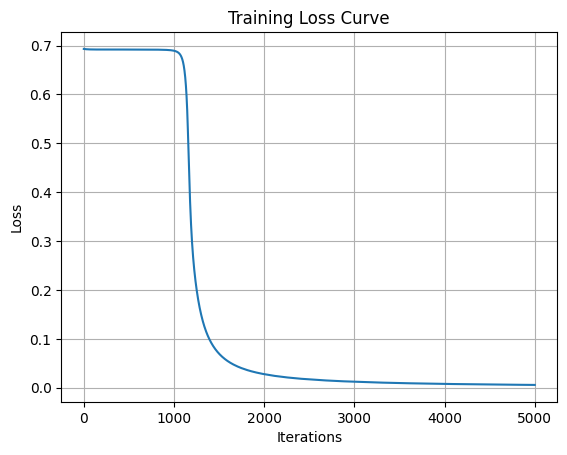

In [204]:
import matplotlib.pyplot as plt
print(plt.__file__)

model = MyNeuralNetwork([X_train.shape[0], 10, 5, 1])

losses = []

for i in range(5000):
    predict = model.forward(X_train)
    dw, db = model.backward(y_train)
    model.update_params(dw, db, alpha=0.05)

    cost = model.compute_cost(predict, y_train)
    losses.append(cost)

    if i % 500 == 0:
        print("cost:", cost)
        
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


In [198]:
# test the model
y_pred = model.forward(X_test)
y_pred_class = (y_pred > 0.5).astype(int)
accuracy = np.mean(y_pred_class == y_test)
print("Test accuracy:"+ str(accuracy*100) +"%")

Test accuracy:100.0%


### The accuray is 100%, which means it might be overfitting or the test set is too simple. The graph looks flat at first, then suddenly drop sharply, and finally slow down again. This behavior might be caused by the sigmoid function, because sigmoid function has a very small slope at its ends. At the beginning, the model is hindered by vanishing gradients. Once it reaches the middle part of the sigmoid function, the loss decrases rapidly, since the middle of sigmoid function has larger gradient than its two ends.